## RiverCast

### Import Libraries and Datasets

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
# import dataset
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.head(10)

,Station,Year,Month,Day,Hour,Waterlevel,Station.1,Year.1,Month.1,Day.1,...,RF-Intensity.1,Humidity,Precipitation,Temperature,Temperature.1,Humidity.1,Precipitation.1,Temperature.2,Humidity.2,Precipitation.2
0,NANGKA,2012,January,1,1,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
1,NANGKA,2012,January,1,2,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
2,NANGKA,2012,January,1,3,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
3,NANGKA,2012,January,1,4,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
4,NANGKA,2012,January,1,5,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
5,NANGKA,2012,January,1,6,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
6,NANGKA,2012,January,1,7,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
7,NANGKA,2012,January,1,8,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
8,NANGKA,2012,January,1,9,15.86,STO.NINO,2012,January,1,...,0.0,17.64,0.01,26.20,26.20,17.64,0.01,26.20,17.64,0.01
9,NANGKA,2012,January,1,10,15.86,STO.NINO,2012,January,1,...,0.0,17.27,0.02,27.55,27.55,17.27,0.02,27.55,17.27,0.02


In [3]:
# remove non numeric fields
df = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3', 'RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
df = df.astype(np.float64)
df.head(10)

,Waterlevel,Waterlevel.1,Waterlevel.2,Waterlevel.3,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
0,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
1,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
2,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
3,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
4,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
5,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
6,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
7,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
8,15.86,12.53,12.53,21.97,0.0,0.0,26.20,26.20,26.20,17.64,17.64,17.64,0.01,0.01,0.01
9,15.86,12.53,12.53,21.97,0.0,0.0,27.55,27.55,27.55,17.27,17.27,17.27,0.02,0.02,0.02


### Clean Dataset

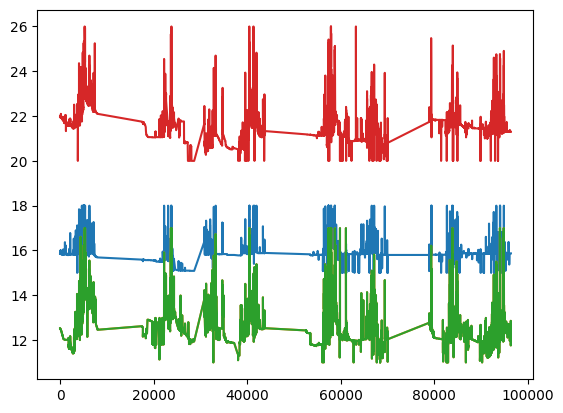

In [4]:
# remove water data outliers
df['Waterlevel'] = df['Waterlevel'].clip(upper=18, lower=15, axis=0)
df['Waterlevel.1'] = df['Waterlevel.1'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.2'] = df['Waterlevel.2'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.3'] = df['Waterlevel.3'].clip(upper=26, lower=20, axis=0)

water_data = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
plt.plot(water_data)

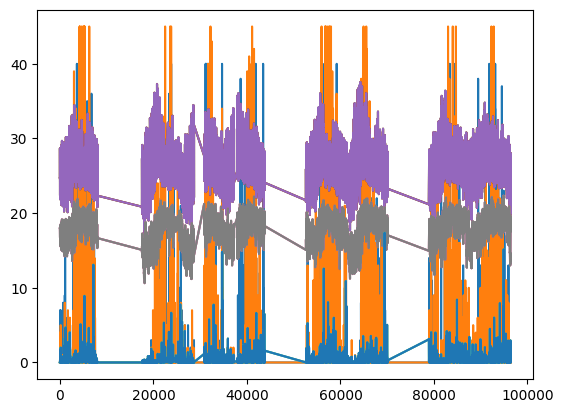

In [5]:
# remove weather data outliers
df['RF-Intensity'] = df['RF-Intensity'].clip(upper=40, lower=0, axis=0)
df['RF-Intensity.1'] = df['RF-Intensity.1'].clip(upper=45, lower=0, axis=0)
df[['Precipitation', 'Precipitation.1', 'Precipitation.2']] = df[['Precipitation', 'Precipitation.1', 'Precipitation.2']].clip(upper=20, lower=0, axis=0)

weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
plt.plot(weather_data)

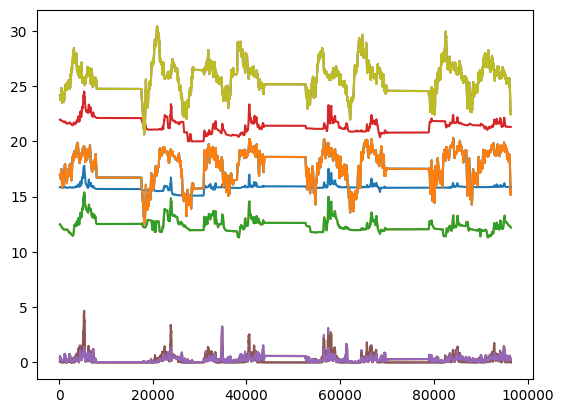

In [6]:
# smoothen time-series using moving average
df = df.rolling(window=168).mean()
df.dropna(inplace=True)
plt.plot(df)

### Principal Component Analysis

In [7]:
# standardize the data
scaled_data = (df - df.mean()) / df.std()
scaled_data.head(10)

,Waterlevel,Waterlevel.1,Waterlevel.2,Waterlevel.3,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
167,0.029692,0.098058,0.098058,0.915519,-0.549673,-0.475817,-1.142507,-1.142507,-1.142507,-0.566178,-0.566178,-0.566178,0.359213,0.359213,0.359213
168,0.029493,0.097394,0.097394,0.915220,-0.549673,-0.475817,-1.150566,-1.150566,-1.150566,-0.570444,-0.570444,-0.570444,0.367571,0.367571,0.367571
169,0.029097,0.096730,0.096730,0.914921,-0.549673,-0.475817,-1.158869,-1.158869,-1.158869,-0.574709,-0.574709,-0.574709,0.378286,0.378286,0.378286
170,0.028700,0.096066,0.096066,0.914623,-0.549673,-0.475817,-1.167294,-1.167294,-1.167294,-0.578975,-0.578975,-0.578975,0.390073,0.390073,0.390073
171,0.028303,0.095402,0.095402,0.914324,-0.549673,-0.475817,-1.175597,-1.175597,-1.175597,-0.583240,-0.583240,-0.583240,0.405931,0.405931,0.405931
172,0.027907,0.094738,0.094738,0.914026,-0.549673,-0.475817,-1.183574,-1.183574,-1.183574,-0.587273,-0.587273,-0.587273,0.426719,0.426719,0.426719
173,0.027510,0.094074,0.094074,0.913727,-0.549673,-0.475817,-1.190982,-1.190982,-1.190982,-0.590840,-0.590840,-0.590840,0.452435,0.452435,0.452435
174,0.027114,0.093410,0.093410,0.913428,-0.549673,-0.475817,-1.196029,-1.196029,-1.196029,-0.592740,-0.592740,-0.592740,0.485866,0.485866,0.485866
175,0.026717,0.092746,0.092746,0.913130,-0.549673,-0.475817,-1.199081,-1.199081,-1.199081,-0.593244,-0.593244,-0.593244,0.520798,0.520798,0.520798
176,0.026320,0.091987,0.091987,0.912831,-0.549673,-0.475817,-1.206245,-1.206245,-1.206245,-0.591344,-0.591344,-0.591344,0.560015,0.560015,0.560015


In [8]:
# reduce data
# convert data to numpy
river_data = scaled_data.to_numpy()

# compute covariance matrix
cov_matrix = np.cov(river_data, ddof=0, rowvar=False)

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
order_of_importance = np.argsort(eigenvalues)[::-1] 

# sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance].real
sorted_eigenvectors = eigenvectors[:,order_of_importance].real

k = 4  # number of features to preserve
river_data = np.matmul(river_data, sorted_eigenvectors[:,:k]) # transform the original data
river_data = np.clip(river_data, -5.0, 5.0)
river_data.shape

(59490, 4)

### Normalized Dataset

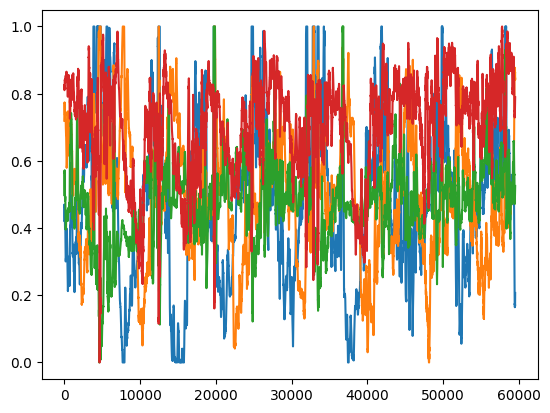

In [9]:
# normalize data
x_scaler = MinMaxScaler()
river_data = x_scaler.fit_transform(river_data)
plt.plot(river_data)

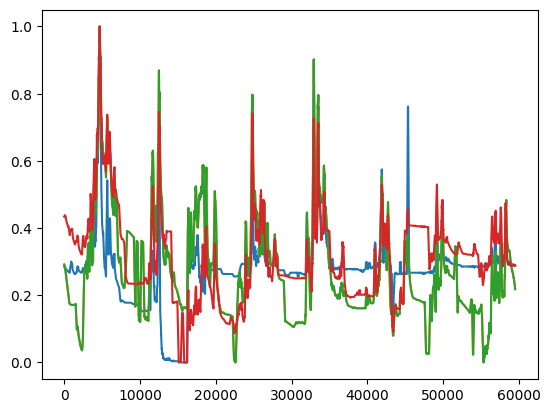

In [10]:
y_scaler = MinMaxScaler()
water_data = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
water_data = y_scaler.fit_transform(water_data)
plt.plot(water_data)

In [11]:
river_data.shape == water_data.shape

True

### Prepare Training Batches

In [12]:
# utilize rolling window to generate dataset
MAX_TOKENS = 168
window_size = MAX_TOKENS + 1
window_step = 24
series_len = len(river_data) - window_size

river_windows = np.array([river_data[i:(i + window_size)] for i in range(0, series_len, window_step)])
water_windows = np.array([water_data[i:(i + window_size)] for i in range(0, series_len, window_step)])

print(river_windows.shape)
print(water_windows.shape)

(2472, 169, 4)
(2472, 169, 4)


In [13]:
# training dataset
X_train = np.array([arr[:-1] for arr in river_windows[:1726]])
Y_train =np.array([arr[1:] for arr in water_windows[:1726]])

print(X_train.shape)
print(Y_train.shape)

# validation dataset
X_val = np.array([arr[:-1] for arr in river_windows[1726:2092]])
Y_val =np.array([arr[1:] for arr in water_windows[1726:2092]])

print(X_val.shape)
print(Y_val.shape)

# testing dataset
X_test = np.array([arr[:-1] for arr in river_windows[2092:]])
Y_test =np.array([arr[1:] for arr in water_windows[2092:]])

print(X_test.shape)
print(Y_test.shape)

(1726, 168, 4)
(1726, 168, 4)
(366, 168, 4)
(366, 168, 4)
(380, 168, 4)
(380, 168, 4)


### Build the Model

In [14]:
# Positional Encoding
def positional_encoding(length, depth):
    depth = depth / 2
    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate(
        [np.sin(angle_rads), np.cos(angle_rads)],
        axis=-1) 

    return tf.cast(pos_encoding, dtype=tf.float32)


class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, d_model):
        super().__init__()
        self.d_model = d_model
        self.pos_encoding = positional_encoding(length=2048, depth=d_model)

    def call(self, x):
        length = tf.shape(x)[1]
        # This factor sets the relative scale of the positional encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

In [15]:
# Attention Layers

class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
    
class CausalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            use_causal_mask=True)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

In [16]:
# Feed Forward Layer

class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='sigmoid'),
            tf.keras.layers.Dense(dff, activation='sigmoid'),
            tf.keras.layers.Dense(d_model, activation='sigmoid'),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x) 
        return x

In [17]:
# Decoder Layer
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super(DecoderLayer, self).__init__()
        self.causal_self_attention = CausalSelfAttention(
            num_heads=2,
            key_dim=d_model,
            dropout=dropout_rate)
        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.causal_self_attention(x=x)
        x = self.ffn(x)  
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.dec_layer = DecoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.last_attn_scores = None

    def call(self, x):
        x = self.pos_embedding(x)
        x = self.dropout(x)
        x = self.dec_layer(x)

        return x

In [18]:
# Transformer Model

class Transformer(tf.keras.Model):
    def __init__(self, *, d_model, dff, target_output_size, dropout_rate=0.1):
        super().__init__()
        self.decoder = Decoder(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.final_layer = tf.keras.layers.Dense(target_output_size, activation='sigmoid')

    def call(self, x):
        x = self.decoder(x)  # (batch_size, target_len, d_model)

        # Final linear layer output.
        x = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

        try:
            # Drop the keras mask, so it doesn't scale the losses/metrics.
            # b/250038731
            del x._keras_mask
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return x

In [19]:
transformer = Transformer(d_model=4, dff=512, target_output_size=4)

output = transformer(X_test)
output.shape

TensorShape([380, 168, 4])

In [20]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder (Decoder)           multiple                  267440    
                                                                 
 dense_3 (Dense)             multiple                  20        
                                                                 
Total params: 267460 (1.02 MB)
Trainable params: 267460 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
import keras 

callback = keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=3)

transformer.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.MeanAbsoluteError()])

transformer.fit(x=X_train, y=Y_train, batch_size=128, epochs=100, validation_data=(X_val, Y_val), callbacks=[callback])

Epoch 1/100
14/14 [==============================] - 12s 648ms/step - loss: 0.0837 - mean_absolute_error: 0.2365 - val_loss: 0.0712 - val_mean_absolute_error: 0.2226
Epoch 2/100
14/14 [==============================] - 8s 596ms/step - loss: 0.0720 - mean_absolute_error: 0.2195 - val_loss: 0.0592 - val_mean_absolute_error: 0.2048
Epoch 3/100
14/14 [==============================] - 9s 640ms/step - loss: 0.0623 - mean_absolute_error: 0.2043 - val_loss: 0.0520 - val_mean_absolute_error: 0.1937
Epoch 4/100
14/14 [==============================] - 10s 704ms/step - loss: 0.0541 - mean_absolute_error: 0.1905 - val_loss: 0.0449 - val_mean_absolute_error: 0.1822
Epoch 5/100
14/14 [==============================] - 10s 688ms/step - loss: 0.0474 - mean_absolute_error: 0.1786 - val_loss: 0.0400 - val_mean_absolute_error: 0.1734
Epoch 6/100
14/14 [==============================] - 9s 679ms/step - loss: 0.0423 - mean_absolute_error: 0.1685 - val_loss: 0.0349 - val_mean_absolute_error: 0.1627
Epoch 7

### Test the Model

In [22]:
# measure accuracy
from sklearn.metrics import mean_absolute_error

pred = transformer.predict(X_test, verbose=None)
mean_absolute_error(y_true=np.reshape(Y_test, (-1, 4)), y_pred=np.reshape(pred, (-1, 4)))

0.06873775759955002

In [23]:
def make_predictions(index):
    context = X_test[index][:48]
    target = Y_test[index][:48]
    
    for i in range(48):
        y_pred = transformer.predict(x=np.array([target]), verbose=None)
        target = np.vstack((target, np.array([y_pred[0][-1]])))
     
    plt.plot(target)

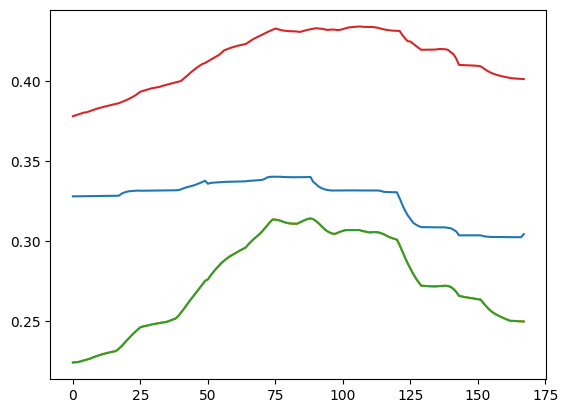

In [24]:
plt.plot(Y_test[256])

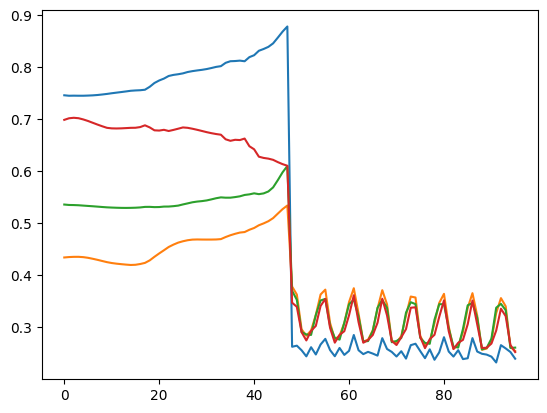

In [25]:
make_predictions(256)

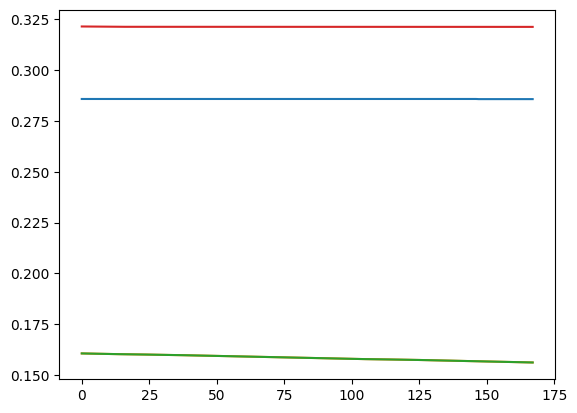

In [26]:
plt.plot(Y_test[120])

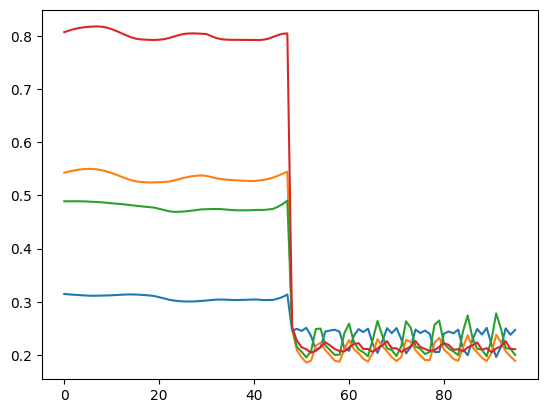

In [27]:
make_predictions(120)